<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/Pollution_RNN_daily_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load DATA


#### Data Main Source
#####https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [13]:
!git clone "https://github.com/puraminy/mini_proj2"

fatal: destination path 'mini_proj2' already exists and is not an empty directory.


In [14]:
import numpy as np
import pandas as pd

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"

#github = "https://raw.githubusercontent.com/puraminy/mini_proj2/master/polution.csv"

github = "mini_proj2/polution.csv"

c=pd.read_csv(github)
data=np.asarray(c)
print(data)
np.shape(data)

[[0.12977867 0.35294122 0.24590163 ... 0.00229001 0.         0.        ]
 [0.14889336 0.36764708 0.24590163 ... 0.00381099 0.         0.        ]
 [0.15995975 0.42647061 0.22950819 ... 0.00533197 0.         0.        ]
 ...
 [0.01006036 0.2647059  0.26229507 ... 0.40558836 0.         0.        ]
 [0.01006036 0.2647059  0.26229507 ... 0.41399646 0.         0.        ]
 [0.00804829 0.2647059  0.24590163 ... 0.42086649 0.         0.        ]]


(43799, 8)

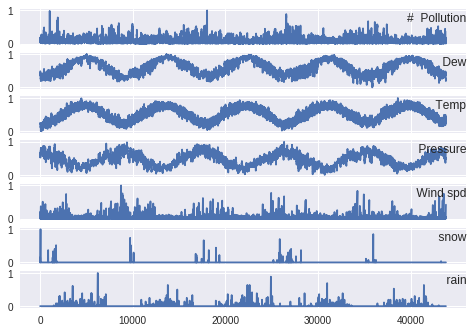

In [15]:
from matplotlib import pyplot
values = c.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(c.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

# Preparing Time Series

In [0]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
def create_data(n_hours = 24, n_train = 10000):
  dataset = read_csv('mini_proj2/polution.csv', header=0)
  values = dataset.values
  
  print(np.shape(values))
  # integer encode direction
  encoder = LabelEncoder()
  values[:,4] = encoder.fit_transform(values[:,4])
  # ensure all data is float
  values = values.astype('float32')
  # normalize features
  # scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = values # scaler.fit_transform(values)
  # specify the number of lag hours
  # n_hours = 24
  n_features = 8 
  # frame as supervised learning
  reframed = series_to_supervised(scaled, n_hours, 1)

 # print(reframed[:2])
 # print(reframed.shape)

  # split into train and test sets
  values = reframed.values
   #365 * 24
  train = values[:n_train, :]
  test = values[n_train:, :]
  # split into input and outputs
  n_obs = n_hours * n_features
  train_X, train_y = train[:, :n_obs], train[:, -n_features]

  test_X, test_y = test[:, :n_obs], test[:, -n_features]
  print(train_X.shape, len(train_X), train_y.shape)
  # reshape input to be 3D [samples, timesteps, features]
    
  train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
  test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y



# Split Train & Test Data

In [75]:
def create_data2(n_hours = 7*24, n_train = 10000, step =1):
  c=pd.read_csv(github)
  data=np.asarray(c)

  print(np.shape(data))
  
  print(data.shape[0])
  n_test = data.shape[0]-n_train
  train = data[:n_train, :]
  test = data[n_train:n_train+n_test, :]

  train_X = np.zeros([n_train-n_hours, 7, 8])
  for i in range (n_train-n_hours):
    for j in range (7):
      train_X[i, j, :] = train[i+24*j,:]
  train_y = train[n_hours:, 0]
  
  test_X = np.zeros([n_test-n_hours, 7, 8])
  for i in range (n_test-n_hours):
    for j in range (7):
      test_X[i, j, :] = test[i+24*j,:]
  test_y = test[n_hours:, 0]
  

  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y

def create_data3(n_records = 7, n_train = 10000, stride =24):
  n_train+=n_records*stride
  c=pd.read_csv(github)
  data=np.asarray(c)

  
  encoder = LabelEncoder()
  data[:,4] = encoder.fit_transform(data[:,4])
  
  data = data.astype('float32')
  print(np.shape(data))
  
  print(data.shape[0])
  n_test = data.shape[0]-n_train
  train = data[:n_train, :]
  test = data[n_train:n_train+n_test, :]

  n_items = n_records*stride

  train_X = np.zeros([n_train-n_items, n_records, 8])
  train_y = np.zeros([n_train-n_items, 1])
  
  
  for i in range (n_train-n_items):
      train_X[i,:,:] = train[i:i+n_items:stride,:]
      train_y[i] = train[i+n_items,0]

  test_X = np.zeros([n_test-n_items, n_records, 8])
  test_y = np.zeros([n_test-n_items, 1])
  for i in range (n_test-n_items):
      test_X[i,:,:] = test[i:i+n_items:stride,:]
      test_y[i] = test[i+n_items,0]

  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y

# create_data2(n_hours = 24*7, n_train = 10000, step =1)
create_data3(n_records = 7, n_train = 10000, stride =24)




(43799, 8)
43799
(10000, 7, 8) (10000, 1) (33463, 7, 8) (33463, 1)


(array([[[0.12977867, 0.35294122, 0.24590163, ..., 0.00229001,
          0.        , 0.        ],
         [0.09054326, 0.48529413, 0.21311474, ..., 0.09930788,
          0.14814815, 0.        ],
         [0.07947686, 0.38235295, 0.1147541 , ..., 0.02672819,
          0.        , 0.        ],
         ...,
         [0.05633803, 0.22058827, 0.03278688, ..., 0.04508246,
          0.        , 0.        ],
         [0.12776659, 0.27941179, 0.04918033, ..., 0.01452619,
          0.        , 0.        ],
         [0.21126761, 0.27941179, 0.03278688, ..., 0.00229001,
          0.        , 0.        ]],
 
        [[0.14889336, 0.36764708, 0.24590163, ..., 0.00381099,
          0.        , 0.        ],
         [0.06338028, 0.47058827, 0.21311474, ..., 0.10465693,
          0.18518519, 0.        ],
         [0.0583501 , 0.35294122, 0.16393442, ..., 0.03665727,
          0.        , 0.        ],
         ...,
         [0.07746479, 0.22058827, 0.0819672 , ..., 0.006101  ,
          0.        , 0.

# Model

(43799, 8)
43799
(10000, 7, 8) (10000, 1) (33463, 7, 8) (33463, 1)
##################### Model model_normal_adam Hours 168 ##################


Train on 9000 samples, validate on 1000 samples
Epoch 1/8
9000/9000 [==============================] - 12s 1ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - val_loss: 0.0893 - val_mean_absolute_error: 0.0893
Epoch 2/8
9000/9000 [==============================] - 0s 48us/step - loss: 0.0674 - mean_absolute_error: 0.0674 - val_loss: 0.0867 - val_mean_absolute_error: 0.0867
Epoch 3/8
9000/9000 [==============================] - 0s 48us/step - loss: 0.0650 - mean_absolute_error: 0.0650 - val_loss: 0.0799 - val_mean_absolute_error: 0.0799
Epoch 4/8
9000/9000 [==============================] - 0s 47us/step - loss: 0.0633 - mean_absolute_error: 0.0633 - val_loss: 0.0852 - val_mean_absolute_error: 0.0852
Epoch 5/8
9000/9000 [==============================] - 0s 46us/step - loss: 0.0630 - mean_absolute_error: 0.0630 - val_loss: 0.0803 - val_mean_a

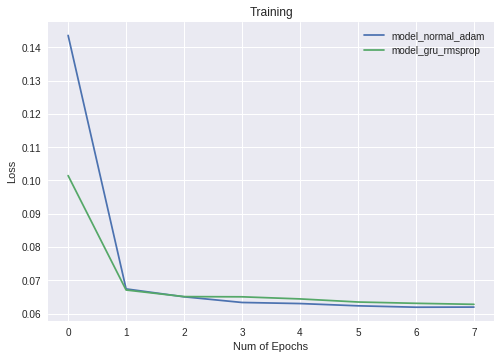

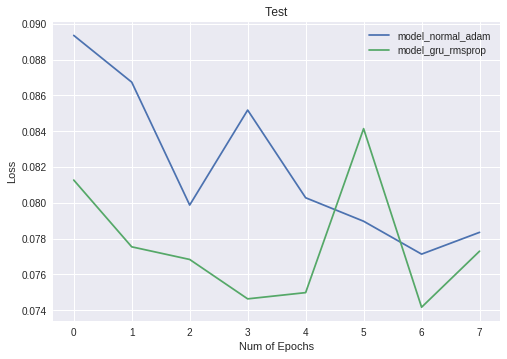

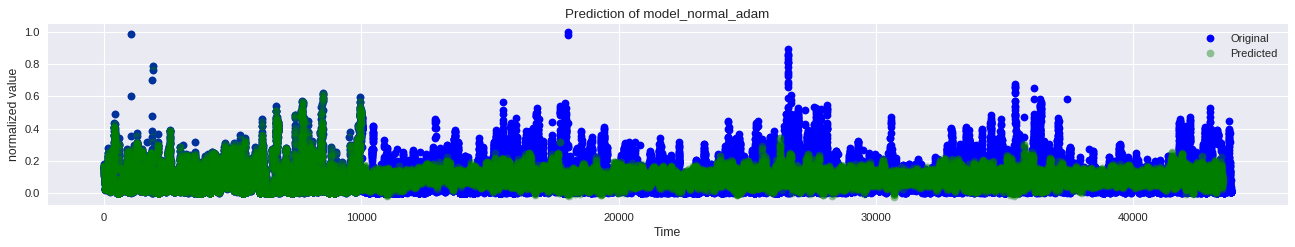

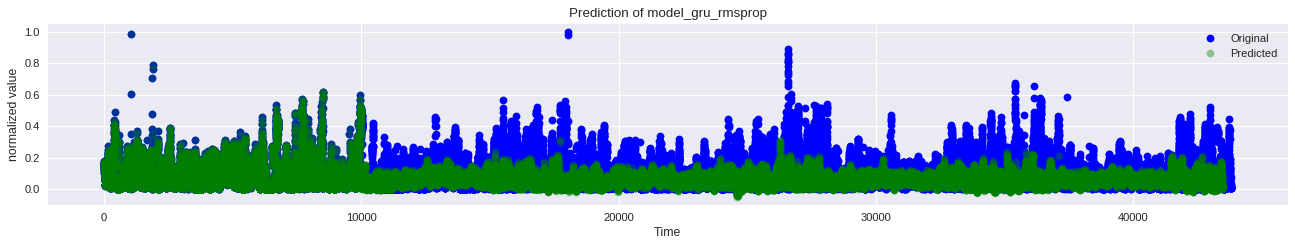

In [77]:
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN

import tensorflow as tf

def create_model(cell_type = "normal", optimizer = 'adam'):
  if cell_type == "lstm":
    model = Sequential()
    model.add(LSTM(30, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1, activation='linear'))
  elif cell_type == "gru":
    model = Sequential()
    model.add(GRU(30, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1, activation='linear'))
  elif cell_type == "rnn":
    model = Sequential()
    model.add(SimpleRNN(30, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1, activation='linear'))
  else:
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(10))
#     model.add(Dense(20)) 
    model.add(Dense(10)) 
    model.add(Dense(1, activation='linear'))
  
  model.name = 'model_' + cell_type + '_' + optimizer
  if optimizer == 'rmsprop':
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
#   model.compile(loss='mae', optimizer=optimizer)
  
  model.compile(loss='mae',
              optimizer=optimizer,
              metrics=['mae'])

  return model

n_train = 10000
n_hours = 24*7

train_X,train_y, test_X, test_y = create_data3(n_records=7, 
                                               n_train=n_train,
                                               stride=24)

model_normal_adam = create_model(optimizer='adam') #0
model_normal_sgd = create_model(optimizer='sgd') #1
model_normal_rmsprop = create_model(optimizer='rmsprop') #2

model_lstm_adam = create_model("lstm", 'adam') #3
model_lstm_sgd = create_model("lstm",'sgd') #4
model_lstm_rmsprop = create_model("lstm",'rmsprop') #5


model_gru_adam = create_model("gru", 'adam') #6
model_gru_sgd = create_model("gru", 'sgd') #7
model_gru_rmsprop = create_model("gru", 'rmsprop') #8


model_rnn_adam = create_model("rnn", 'adam') #9
model_rnn_sgd = create_model("rnn", 'sgd') #10
model_rnn_rmsprop = create_model("rnn", 'rmsprop') #11


models = [model_normal_adam, model_normal_sgd, model_normal_rmsprop,
          model_lstm_adam, model_lstm_sgd, model_lstm_rmsprop,
          model_gru_adam,model_gru_sgd, model_gru_rmsprop,
          model_rnn_adam, model_rnn_sgd, model_rnn_rmsprop]


Run = [0]*len(models)
Run[0] = 1
Run[8] = 1
# Run[6] = 1
# Run[9] = 1
EPOCHS =[8]*len(models)
model_index = 0

legends = []
silent = False

for model in models:

  # fit network
  model_name = model.name
  print(f"##################### Model {model_name} Hours {n_hours} ##################")
  print("\n")

  if not Run[model_index]:
    print("Skipped")
    model_index+=1
    continue

  legends.append(model_name)

  history = model.fit(train_X, train_y, 
                      epochs=EPOCHS[model_index], batch_size=72, 
#                       validation_data=(test_X, test_y), 
                      validation_split=0.1,
                      verbose=1, shuffle=True)
  # plot history
  if not silent: 
    plt.figure(0)
    plt.plot(history.history['loss'], label='train')
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training")
    plt.legend(legends)

    plt.figure(1)
    plt.plot(history.history['val_loss'], label='test')
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Test")
    plt.legend(legends)

  test_predictions = model.predict(test_X).flatten()
  test_loss = model.evaluate(test_X, test_y)
  print("test loss:", test_loss)

  if not silent:
    plt.figure(num=model_index+2, figsize=(20, 3), dpi=80, facecolor='w', edgecolor='k')
    plt.title(f"Prediction of {model_name}")
    plt.xlabel('Time')
    plt.ylabel('normalized value')
    plt.legend(('Original', 'Predicted'), loc='upper right')
    plt.plot(data[:,0], 'bo')
    plt.plot(np.concatenate([data[:n_train,0],test_predictions]), 'go', alpha=0.4)
    plt.legend(('Original', 'Predicted'), loc='upper right')
    plt.savefig(model_name)

  model_index +=1


plt.show()

## Results 


|hours|Mean Absolute Error |  loss function 
|--|--|
|1  |  0.01328097059825935
|10 |   0.016554366017757748 
| 24 | 0.02725420025859075 
| 50|  0.023748632413918377
| 50 |    0.03477914220943476 | MSE
| 1 |  0.042994678616862125
| 1 |  0.016500973061146625
| 48| 0.02513334271283482 
|48| 0.01888059062355331
|72| 0.020766058881570845




In [7]:
|# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf


# y_train = train_y
# x_train = train_X

# y_test = test_y
# x_test = test_X

# EPOCHS = 10

# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(120, activation=tf.nn.relu),
#     tf.keras.layers.Dense(18, activation=tf.nn.relu),
#     tf.keras.layers.Dense(1, activation='linear')
# ])

# optimizer = tf.train.RMSPropOptimizer(0.001)

# model.compile(loss='mse',
#               optimizer=optimizer,
#               metrics=['mae'])


# # Store training stats
# import matplotlib.pyplot as plt


# def plot_history(history):
#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error ')
#     plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
#              label='Train Loss')
#     plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
#              label='Val loss')
#     plt.legend()
#     #plt.ylim([0, 0.2])


# #model.summary()
# history = model.fit(x_train, y_train, epochs=EPOCHS,
#                 validation_split=0.1, verbose=1)

# model.summary()

# plot_history(history)
# test_predictions = model.predict(x_test).flatten()
# test_acc, test_loss = model.evaluate(x_test, y_test)
# print(f"test accuracy: {test_acc}, test loss {test_loss}")

SyntaxError: ignored

#Plot Predicted Values

In [0]:

# plt.figure(num=None, figsize=(20, 3), dpi=80, facecolor='w', edgecolor='k')
# plt.xlabel('Time')
# plt.ylabel('normalized value')
# plt.legend(('Original', 'Predicted'), loc='upper right')
# plt.plot(data[:,0], 'bo')
# plt.plot(np.concatenate([data[:n_train,0],test_predictions]), 'go')
# plt.legend(('Original', 'Predicted'), loc='upper right')
